In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
player_stats = pd.read_csv("Data/NBA Player Salaries (2022-23 Season)_exported.csv", index_col="Player Name")
player_stats.head()

,Unnamed: 0,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Player Name,,,,,,,,,,,,,,,,,,,,,
Stephen Curry,0,48070014,PG,34,GSW,56,56,34.7,10.0,20.2,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
John Wall,1,47345760,PG,32,LAC,34,3,22.2,4.1,9.9,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
Russell Westbrook,2,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,13.6,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
LeBron James,3,44474988,PF,38,LAL,55,54,35.5,11.1,22.2,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
Kevin Durant,4,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,18.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9


In [5]:
player_stats.columns

Index(['Unnamed: 0', 'Salary', 'Position', 'Age', 'Team', 'GP', 'GS', 'MP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'Total Minutes', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [6]:
columns_to_keep = ['Salary', 'Position', 'Team', 'Age', 'GP', 'GS', 'MP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']

player_stats_subset = player_stats[columns_to_keep]
player_stats_subset.head()

,Salary,Position,Team,Age,GP,GS,MP,FG,FGA,FG%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Player Name,,,,,,,,,,,,,,,,,,,,,
Stephen Curry,48070014,PG,GSW,34,56,56,34.7,10.0,20.2,0.493,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
John Wall,47345760,PG,LAC,32,34,3,22.2,4.1,9.9,0.408,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
Russell Westbrook,47080179,PG,LAL/LAC,34,73,24,29.1,5.9,13.6,0.436,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
LeBron James,44474988,PF,LAL,38,55,54,35.5,11.1,22.2,0.500,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
Kevin Durant,44119845,PF,BRK/PHO,34,47,47,35.6,10.3,18.3,0.560,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9


Initial look at the data with some salary comparisons:

In [7]:
player_stats_subset["Points per Dollar"] = player_stats_subset["PTS"] / (player_stats_subset["Salary"]/ 1000000)

/var/folders/vc/hnx3lsvx1kvgvw_ddc1xkltc0000gn/T/ipykernel_73131/3403865468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_stats_subset["Points per Dollar"] = player_stats_subset["PTS"] / (player_stats_subset["Salary"]/ 1000000)


In [8]:
player_stats_subset["Games Started per Dollar"] = player_stats_subset["GS"] / (player_stats_subset["Salary"]/ 1000000)

In [9]:
player_stats_subset["Age per Dollar"] = player_stats_subset["Age"] / (player_stats_subset["Salary"]/ 1000000)

In [10]:
player_stats_subset["Usage per Dollar"] = player_stats_subset["USG%"] / (player_stats_subset["Salary"]/ 1000000)

In [11]:
player_stats_subset["Turnovers per Dollar"] = player_stats_subset["TOV"] / (player_stats_subset["Salary"]/ 1000000)

In [12]:
player_stats_subset["Offensive Win Shares per Dollar"] = player_stats_subset["OWS"] / (player_stats_subset["Salary"]/ 1000000)

In [13]:
player_stats_subset["Defnesive Win Shares per Dollar"] = player_stats_subset["DWS"] / (player_stats_subset["Salary"]/ 1000000)

In [14]:
player_stats_subset["Box Plus/Minus per Dollar"] = player_stats_subset["BPM"] / (player_stats_subset["Salary"]/ 1000000)

In [15]:
player_stats_subset["Player Efficiency per Dollar"] = player_stats_subset["PER"] / (player_stats_subset["Salary"]/ 1000000)

In [16]:
player_stats_subset.head()

,Salary,Position,Team,Age,GP,GS,MP,FG,FGA,FG%,...,VORP,Points per Dollar,Games Started per Dollar,Age per Dollar,Usage per Dollar,Turnovers per Dollar,Offensive Win Shares per Dollar,Defnesive Win Shares per Dollar,Box Plus/Minus per Dollar,Player Efficiency per Dollar
Player Name,,,,,,,,,,,,,,,,,,,,,
Stephen Curry,48070014,PG,GSW,34,56,56,34.7,10.0,20.2,0.493,...,4.7,0.611608,1.164967,0.707302,0.644893,0.066570,0.120657,0.041606,0.156022,0.501352
John Wall,47345760,PG,LAC,32,34,3,22.2,4.1,9.9,0.408,...,0.1,0.240782,0.063364,0.675879,0.570273,0.050691,-0.008448,0.014785,-0.025345,0.287249
Russell Westbrook,47080179,PG,LAL/LAC,34,73,24,29.1,5.9,13.6,0.436,...,1.2,0.337722,0.509769,0.722172,0.588358,0.074341,-0.012744,0.055225,0.004248,0.341970
LeBron James,44474988,PF,LAL,38,55,54,35.5,11.1,22.2,0.500,...,4.0,0.649803,1.214166,0.854413,0.748735,0.071951,0.071951,0.053963,0.137156,0.537381
Kevin Durant,44119845,PF,BRK/PHO,34,47,47,35.6,10.3,18.3,0.560,...,3.9,0.659567,1.065280,0.770628,0.695832,0.074796,0.106528,0.047598,0.160925,0.587037


REC 1:
Inital Visualization:

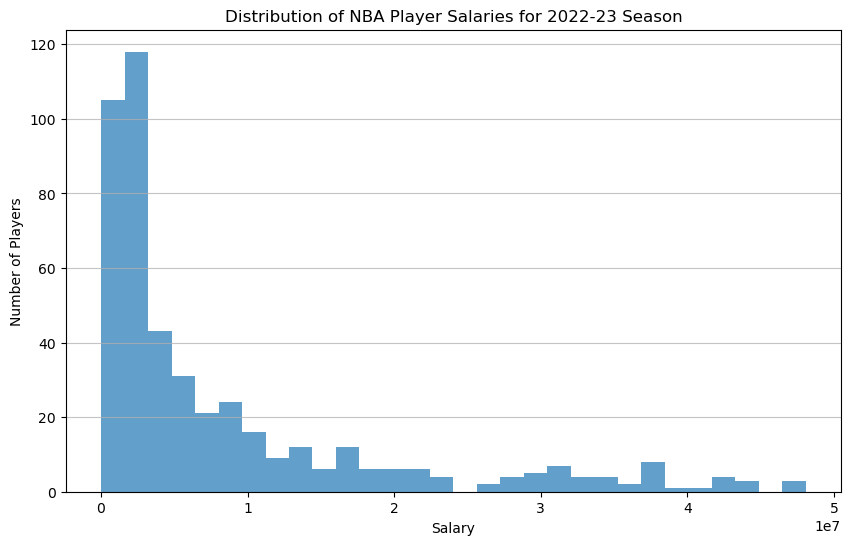

In [17]:
# Visualize the distribution of player salaries
plt.figure(figsize=(10,6))
player_stats_subset['Salary'].plot(kind='hist', bins=30, alpha=0.7)
plt.title('Distribution of NBA Player Salaries for 2022-23 Season')
plt.xlabel('Salary')
plt.ylabel('Number of Players')
plt.grid(axis='y', alpha=0.75)
plt.show()

The histogram illustrates the distribution of NBA player salaries for the 2022-23 season. Most players fall within the lower salary brackets, indicating a skewed distribution with a smaller number of players earning significantly higher salaries.

Total salary paid by each NBA team for the 2022-23 season - TOP 10 Teams 

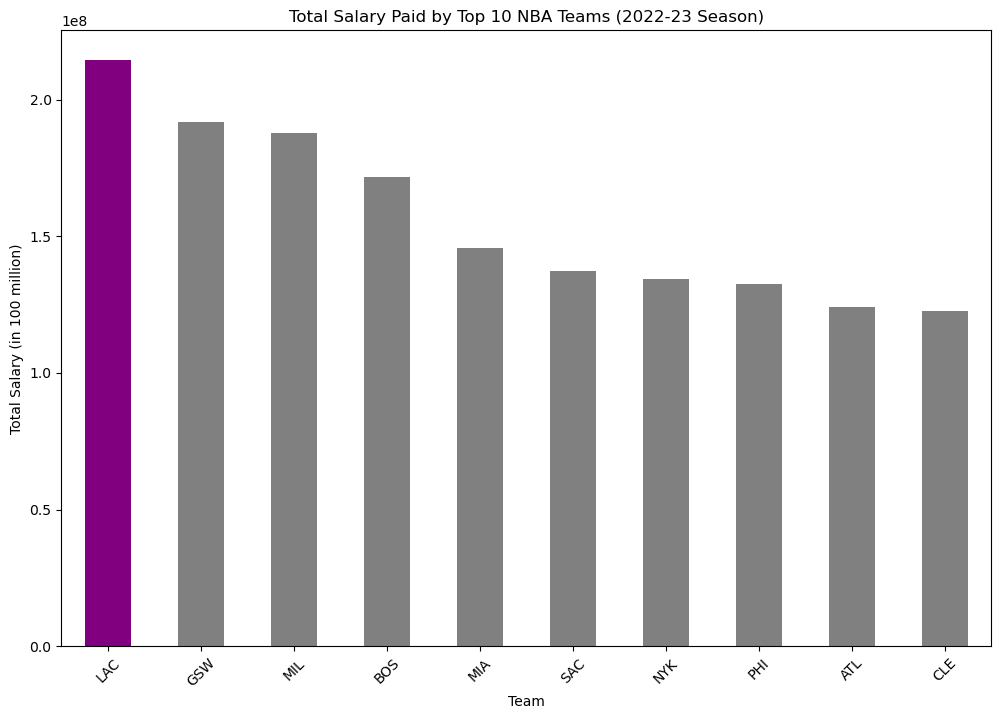

In [18]:
import matplotlib.pyplot as plt
# Calculate the total salary paid by each team
team_salary = player_stats_subset.groupby('Team')['Salary'].sum().sort_values(ascending=False)

# Select only the top 10 teams
top_10_teams = team_salary.head(10)

# Define a list of colors
colors = ['purple'] + ['gray'] * 9  

# Plot the total salary paid by each team 
plt.figure(figsize=(12,8))
top_10_teams.plot(kind='bar', color=colors)
plt.title('Total Salary Paid by Top 10 NBA Teams (2022-23 Season)')
plt.xlabel('Team')
plt.ylabel('Total Salary (in 100 million)')
plt.xticks(rotation=45)
plt.show()




Average Salary by Age

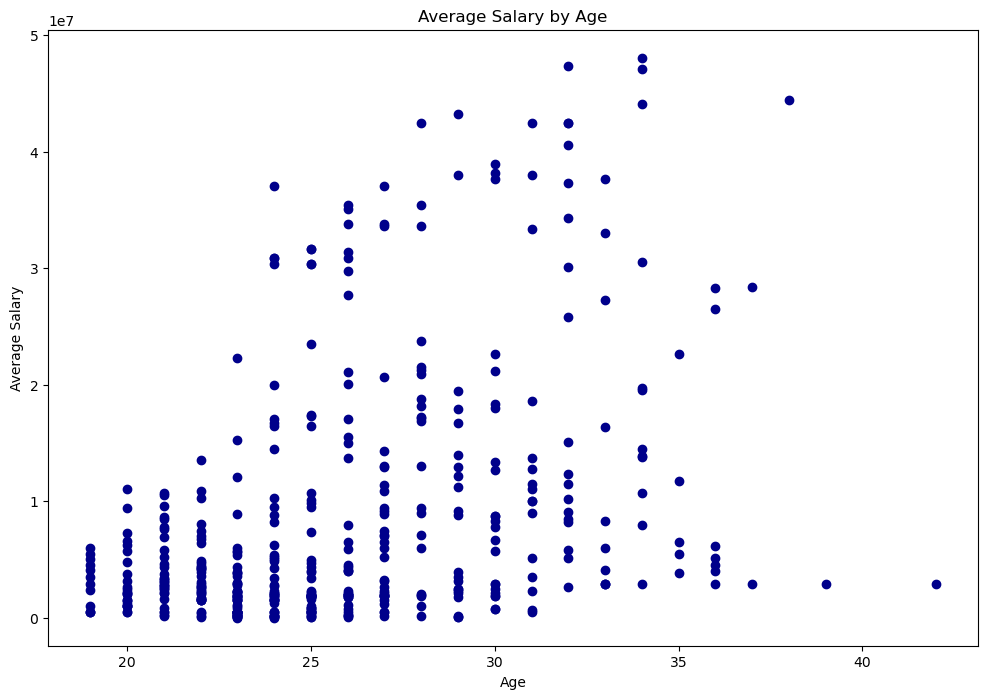

In [19]:
import matplotlib.pyplot as plt

player_stats_subset = player_stats[['Age', 'Salary']]

# plot the average salary by age 
plt.figure(figsize=(12, 8))
plt.scatter(x=player_stats_subset['Age'], y=player_stats_subset['Salary'], color='darkblue')
plt.title('Average Salary by Age')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.show()



Total salary paid to NBA players by position for the 2022-23 season

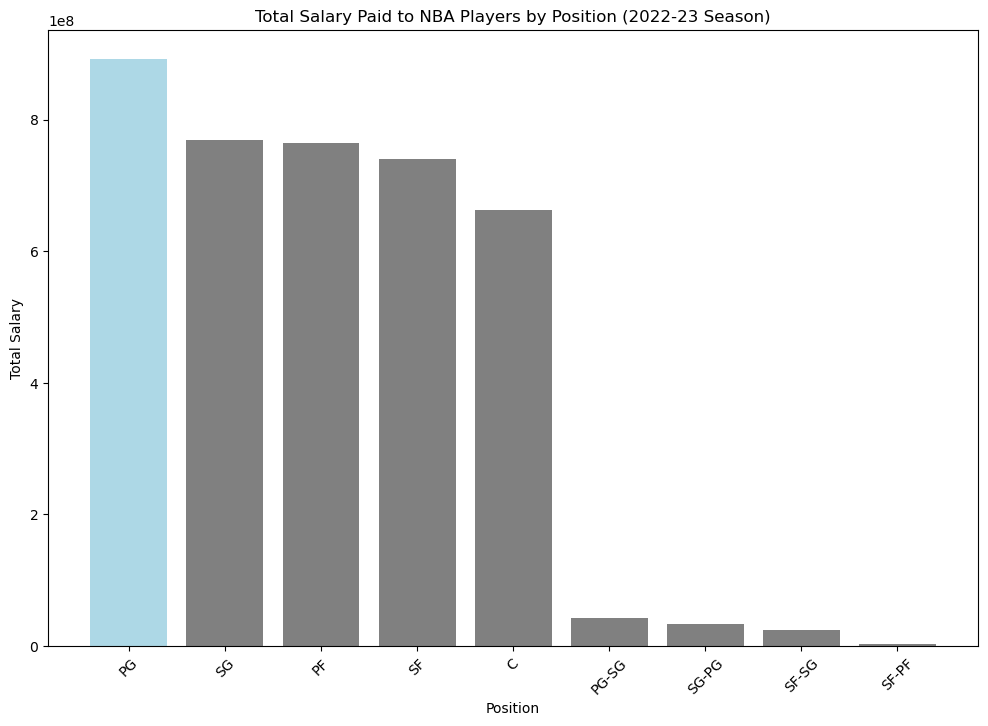

In [20]:

# Calculate the total salary paid by each position
position_salary = player_stats.groupby('Position')['Salary'].sum().sort_values(ascending=False)

colors = ['lightblue'] + ['gray'] * 8
# Plot the total salary paid by each position
plt.figure(figsize=(12,8))
plt.bar(position_salary.index, position_salary.values, color=colors)
plt.title('Total Salary Paid to NBA Players by Position (2022-23 Season)')
plt.xlabel('Position')
plt.ylabel('Total Salary')
plt.xticks(rotation=45)
plt.show()

REC 2: Cluster by position and salary; which positions are living up to their contract?

In [21]:
from sklearn.cluster import KMeans

In [22]:
#drop the NA values so regression can be ran
player_no_na = player_stats.dropna()

In [23]:

non_numeric_columns = ['Team', 'Position']
player_no_na_numeric = player_no_na.drop(columns=non_numeric_columns)

non_numeric_columns_remaining = player_no_na_numeric.select_dtypes(exclude=['number']).columns

if not non_numeric_columns_remaining.empty:
    
    print(f"Remaining non-numeric columns: {non_numeric_columns_remaining}")
else:
    # All columns are numeric, proceed with KMeans
    kmeans = KMeans(n_clusters=3, random_state=0).fit(player_no_na_numeric)


/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
kmeans_labels = kmeans.labels_  # Cluster labels assigned to each data point
kmeans_cluster_centers = kmeans.cluster_centers_  # Coordinates of cluster centers in feature space

# Add cluster labels to your original dataset
player_no_na_labeled = player_no_na.copy()
player_no_na_labeled['Cluster_Labels'] = kmeans_labels

# Display the labeled dataset
print(player_no_na_labeled.head())

# Display the coordinates of cluster centers
print("Cluster Centers:")
print(kmeans_cluster_centers)


                   Unnamed: 0    Salary Position  Age     Team  GP  GS    MP  \
Player Name                                                                    
Stephen Curry               0  48070014       PG   34      GSW  56  56  34.7   
John Wall                   1  47345760       PG   32      LAC  34   3  22.2   
Russell Westbrook           2  47080179       PG   34  LAL/LAC  73  24  29.1   
LeBron James                3  44474988       PF   38      LAL  55  54  35.5   
Kevin Durant                4  44119845       PF   34  BRK/PHO  47  47  35.6   

                     FG   FGA  ...  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  \
Player Name                    ...                                           
Stephen Curry      10.0  20.2  ...  31.0  5.8  2.0  7.8  0.192   7.5   0.1   
John Wall           4.1   9.9  ...  27.0 -0.4  0.7  0.3  0.020  -0.8  -0.4   
Russell Westbrook   5.9  13.6  ...  27.7 -0.6  2.6  1.9  0.044   0.3  -0.1   
LeBron James       11.1  22.2  ...  33.3  3.2  2.

In [25]:
# Print the column names in player_no_na_labeled
print(player_no_na_labeled.columns)


Index(['Unnamed: 0', 'Salary', 'Position', 'Age', 'Team', 'GP', 'GS', 'MP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'Total Minutes', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Cluster_Labels'],
      dtype='object')


In [26]:
import plotly.express as px

# Assuming to 
feature1 = 'Position'
feature2 = 'Salary'

# Scatter plot
fig = px.scatter(player_no_na_labeled, x=feature1, y=feature2,
                 color='Cluster_Labels',
                 size=(player_no_na_labeled['PTS'] + player_no_na_labeled['VORP']),
                 symbol=player_no_na_labeled['Cluster_Labels'])

# Customize the plot
fig.update_layout(
    title=f'KMeans Clustering of NBA Player Stats ({feature1} vs. {feature2})',
    xaxis_title=feature1,
    yaxis_title=feature2,
)

# Show the plot
fig.show()


REC 3: Regression: players who are over/under paid by team which teams are overpaying

In [27]:
#Load in the linear regression package 
from sklearn.linear_model import LinearRegression

In [28]:
#drop the NA values so regression can be ran
player_no_na = player_stats.dropna()

In [29]:
X = player_no_na.drop(["Salary", "Team", "Position"], axis=1)
Y = player_no_na["Salary"]

#dropped salary, team, and position here because they do not need to be in the regression
#salary is the response variable



In [30]:
reg = LinearRegression().fit(X, Y)
reg.score(X, Y)

#creating a linear regression model 

0.8293303727338468

In [31]:
#Predicting new Y values based off of X 
Y_hat = reg.predict(X)
Y_hat

array([ 3.99941182e+07,  2.43699679e+07,  2.75421837e+07,  3.99613611e+07,
        4.33781099e+07,  3.09836961e+07,  3.11588516e+07,  3.04698236e+07,
        3.62273192e+07,  3.90037913e+07,  2.45550657e+07,  3.24805808e+07,
        2.48100748e+07,  2.75180125e+07,  3.32663915e+07,  3.09446091e+07,
        2.34918435e+07,  2.47691142e+07,  3.09454950e+07,  2.90680651e+07,
        2.16672614e+07,  2.53985413e+07,  2.64205563e+07,  2.72559111e+07,
        2.68988653e+07,  3.11898548e+07,  2.09593662e+07,  4.13504324e+07,
        2.53835764e+07,  3.29927486e+07,  2.59813927e+07,  2.95227048e+07,
        2.44416219e+07,  3.16127179e+07,  3.39915326e+07,  2.33630559e+07,
        1.97456607e+07,  3.34967294e+07,  2.38602460e+07,  2.63337777e+07,
        2.11826795e+07,  2.79603487e+07,  2.56967073e+07,  2.19735172e+07,
        2.35801617e+07,  2.93198195e+07,  2.20174578e+07,  2.16861463e+07,
        2.67162181e+07,  1.80237939e+07,  2.06221177e+07,  2.04777355e+07,
        1.92520031e+07,  

In [32]:
import plotly.express as px
import plotly.graph_objects as go

In [33]:
fig = px.scatter(
    x=Y,
    y=Y_hat,
    color=player_no_na.index,
    labels = {
        "x": "Actual Salary",
        "y": "Predicted Salary"
    }
)

fig.add_trace(
    go.Scatter(
        x=Y,
        y=Y,
        mode="lines"
    )
)

fig.show()

#plot the data on a graph
#above the line means that a player should be getting paid more based on their stats 
#under the line means a player is getting paid more than they should 